University of Zagreb<br/>
Faculty of Electrical Engineering and Computing<br/>
Department of Electronic Systems and Information Processing

Academic year 2020/2021

**4th laboratory exercise**

*Digital Image Processing and Analysis* (183463)

Date: 2022-03-10

Please send any feedback (corrections, comments, suggestions etc.) regarding this document to franko.sikic@fer.hr.

© University of Zagreb Faculty of Electrical Engineering and Computing, 2021.

Permission is granted to make and distribute copies of this instructions provided the copyright notice and this permission notice are preserved on all copies.

# Introduction

Instructions for laboratory exercises for the course *Digital Image Processing and Analysis* are prepared in a form of a <a href="https://jupyter.org/">Jupyter</a> notebooks.

All problems in prepared notebook are intended to be completed in Python using <a href="https://colab.research.google.com">Google Colaboratory</a> platform (Colab for short).

## How to Submit Your Laboratory Report

Simply write-in your code to all empty code cells and write in your answers to the text cells with questions.

Empty code cells contain the placeholder text `# Write-in your solution` while text cells where you have to write-in someting contain a bold uppercase text **WRITE YOUR ANSWER HERE**.

Once you have completed all problems save this notebook locally in a file named DIPA_LAB_X_NAME_SURNAME.ipynb,
where X is the exercise number, and submit it via Moodle under the appropriate upload section.

Your submissions will be first automatically re-evaluated which corresponds to selecting the *Runtime/Restart and run all* command in Colab. Therefore, it is strongly suggested that you run this command yourself before submitting your notebook. Another thing to do before submission is to clear all the cell outputs by selecting *Edit/Clear all outputs*. This will reduce the size of .ipynb files for upload.

## Student Information

Before proceeding double click on this text and then fill in your name:

Name: Enio Krizman

Student ID number (JMBAG): 0069083848

## Suggested Reading

### General Reading

If you are not familiar with Python then start with a Python tutorial such as e.g. an official one available at <a href="https://docs.python.org/3/tutorial/">https://docs.python.org/3/tutorial/</a>.

Jupyter notebooks are relying on <a href="https://ipython.org/">IPython</a>, which is an interactive Python interpreter. Jupyter notebooks may be run locally or they may be conveniently executed remotely in Google Colaboratory via web browser.

Readers familiar with Matlab who have only basic knowledge of Python are strongly encouraged to read the document <a href="https://numpy.org/doc/stable/user/numpy-for-matlab-users.html">NumPy for Matlab users</a> before attempting to solve this laboratory exercise in Colab.

### Image Processing in Python

Some general image processing functions are available as a part of [`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html). This basic functionality is extended by the [`scikit-image`](https://scikit-image.org/). We will also use [OpenCV](https://opencv.org/).

#Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Importing Required Functions

To simplify the code in Python in this notebook we may deliberately import functions from <a href="https://www.scipy.org/">SciPy</a>, <a href="https://numpy.org/">NumPy</a> and <a href="https://matplotlib.org/">Matplotlib</a> directly into the global namespace so e.g. we can write `fft` instead of `scipy.fft.fft`.

Please keep in mind that such an approach may be tolerated for the purpose of a short laboratory exercise where risks of collisions and side effects are minimal. It is best always avoided in production code.

If you prefer to use namespaces then feel free to change the import statements to retain strict package separation, e.g. `import numpy as np`.

In [ ]:
# Import packages
import cv2
import skimage.io

# To display images in browser
from google.colab.patches import cv2_imshow

# Import some functions to the global namespace for convenience
from scipy.ndimage import *
from scipy.fft import *
from scipy.signal import * 
from scipy.stats import *
from skimage.filters import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import *
from skimage.util.dtype import img_as_float

## Image loading

We will be using images from the [USC-SIPI database](http://sipi.usc.edu/database/) and additional images available on the [DIPA class webpage](https://www.fer.unizg.hr/en/course/dipaa_b/laboratory#%23!p_rep_139398!_-187329). To load any of these images, all we have to do is copy the URL of the image and write the following two lines of code.

In [ ]:
url = "http://sipi.usc.edu/database/preview/misc/5.3.02.png"
img = skimage.io.imread(url, plugin = 'pil')

## Image representations

[Grayscale](https://en.wikipedia.org/wiki/Grayscale) images are composed exclusively of shades of gray. In a computer a 2D gray image is represented as an $M \times N$ matrix of pixel values, which merely represent light intensity. 

It takes several such matrices for colored images - one for each channel. There are several color models used for colored image representation. For instance, an [RGB](https://en.wikipedia.org/wiki/RGB_color_model) image has 3 channels (for red, green and blue color) so an $M \times N \times 3$ matrix is used.   Colored images can be converted to grayscale images, usually by performing a weighted sum of the channels. The [cv2.cvtColor()](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) function is used to convert images from one color space to another.

These representations allow the use of common matrix operators for image processing and analysis. 

In [ ]:
url = "http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.07"
img = skimage.io.imread(url)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # openCV uses BGR (blue, green, red) representation
cv2_imshow(img)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

# 4.1 First order histogram

For grayscale images, the first order histogram represents a relative frequency of the appearance of different levels of gray in the image. 

The first order histogram can be both calculated and displayed by calling the function [numpy.histogram()](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html).

## Example:

In [ ]:
salona = cv2.imread('/content/drive/MyDrive/Images/salona.png')
salona = cv2.cvtColor(salona, cv2.COLOR_BGR2GRAY)

# Show the image
plt.figure(figsize = (8,8))
plt.imshow(salona, cmap = 'gray')
plt.draw()

# Calculate the first order histogram
histogram, bin_edges = np.histogram(salona, bins = 256, range = (0, 256))

# Plot the histogram
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))

plt.plot(bin_edges[:-1], histogram)
plt.show()

For RGB images, we can calculate the first order histogram for each channel separately.

## Example:

In [ ]:
detalj = cv2.imread('/content/drive/MyDrive/Images/detalj.png')
detalj = cv2.cvtColor(detalj, cv2.COLOR_BGR2RGB)

# Show the image
plt.figure(figsize = (8,8))
plt.imshow(detalj, cmap = 'gray')
plt.draw()

# Plot the histogram with three lines, one for each color / channel
plt.figure()
plt.title("First order histogram")
plt.xlim([0, 256])

for i, c in enumerate("rgb"):
    # Calculate the first order histogram for channel c
    histogram, bin_edges = np.histogram(detalj[:,:,i], bins=256, range=(0, 256)) 
    
    plt.plot(bin_edges[:-1], histogram, color = c)

plt.show()

### **4.1.1 Problems**

1. Select several images and display their first order histograms. What do the axes of the histograms represent?

In [ ]:
# Write-in your solution
im1 = cv2.imread('/content/drive/MyDrive/Images/klis2.png')
im2 = cv2.imread('/content/drive/MyDrive/Images/medalja_dubrovnik.png')
im3 = cv2.imread('/content/drive/MyDrive/Images/knjiga_ssa.png')

#im1
# Show the image
plt.figure(figsize = (8,8))
plt.imshow(im1, cmap = 'gray')
plt.draw()

# Calculate the first order histogram
histogram, bin_edges = np.histogram(im1, bins = 256, range = (0, 256))

# Plot the histogram
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))

plt.plot(bin_edges[:-1], histogram)
plt.show()

#im2
# Show the image
plt.figure(figsize = (8,8))
plt.imshow(im2, cmap = 'gray')
plt.draw()

# Calculate the first order histogram
histogram, bin_edges = np.histogram(im2, bins = 256, range = (0, 256))

# Plot the histogram
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))

plt.plot(bin_edges[:-1], histogram)
plt.show()

#im3
# Show the image
plt.figure(figsize = (8,8))
plt.imshow(im3, cmap = 'gray')
plt.draw()

# Calculate the first order histogram
histogram, bin_edges = np.histogram(im3, bins = 256, range = (0, 256))

# Plot the histogram
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))

plt.plot(bin_edges[:-1], histogram)
plt.show()

Na y osi je prikazan intenzitet sivih tonova, a x raposjelu paleta boja od 0 do 256.

# 4.2 Histogram equalization

Histogram equalization is an operation which changes the histogram of an image so that the number of pixels is approximately equal for all brightness levels.

## Example:

In [ ]:
uskoci1 = cv2.imread('/content/drive/MyDrive/Images/uskoci1.png')
uskoci1 = cv2.cvtColor(uskoci1, cv2.COLOR_RGB2GRAY) # Convert to grayscale

# Equalize the histogram by calculating the cumulative distribution function
# of the image
cdf, bin_centers = skimage.exposure.cumulative_distribution(uskoci1)  
result = skimage.img_as_ubyte(np.interp(uskoci1, bin_centers, cdf))

# Plot the original and the equalized image
plt.figsize=(8, 8)
fig, axs = plt.subplots(1, 2, figsize = (8, 16))
axs[0].imshow(uskoci1, cmap='gray')
axs[1].imshow(result, cmap='gray')
fig.show()

### **4.2.1 Problems**

1. Read the images uskoci1.png and salona.png. Display their first order histograms before and after the histogram equalization.

In [ ]:
uskoci1 = cv2.imread('/content/drive/MyDrive/Images/uskoci1.png')
uskoci1 = cv2.cvtColor(uskoci1, cv2.COLOR_RGB2GRAY) # Convert to grayscale

# Equalize the histogram by calculating the cumulative distribution function
# of the image
cdf, bin_centers = skimage.exposure.cumulative_distribution(uskoci1)  
result = skimage.img_as_ubyte(np.interp(uskoci1, bin_centers, cdf))

# Plot the original and the equalized image
plt.figsize=(8, 8)
fig, axs = plt.subplots(1, 2, figsize = (8, 16))
axs[0].imshow(uskoci1, cmap='gray')
axs[1].imshow(result, cmap='gray')
fig.show()

# Calculate the first order histogram
histogram, bin_edges = np.histogram(uskoci1, bins = 256, range = (0, 256))

# Plot the histogram
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))

plt.plot(bin_edges[:-1], histogram)
plt.show()

# Calculate the first order histogram
histogram, bin_edges = np.histogram(result, bins = 256, range = (0, 256))

# Plot the histogram
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))

plt.plot(bin_edges[:-1], histogram)
plt.show()

##salona.png
salona = cv2.imread('/content/drive/MyDrive/Images/salona.png')
salona = cv2.cvtColor(salona, cv2.COLOR_RGB2GRAY) # Convert to grayscale

# Equalize the histogram by calculating the cumulative distribution function
# of the image
cdf, bin_centers = skimage.exposure.cumulative_distribution(salona)  
result = skimage.img_as_ubyte(np.interp(salona, bin_centers, cdf))

# Plot the original and the equalized image
plt.figsize=(8, 8)
fig, axs = plt.subplots(1, 2, figsize = (8, 16))
axs[0].imshow(salona, cmap='gray')
axs[1].imshow(result, cmap='gray')
fig.show()

# Calculate the first order histogram
histogram, bin_edges = np.histogram(salona, bins = 256, range = (0, 256))

# Plot the histogram
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))

plt.plot(bin_edges[:-1], histogram)
plt.show()

# Calculate the first order histogram
histogram, bin_edges = np.histogram(result, bins = 256, range = (0, 256))

# Plot the histogram
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))

plt.plot(bin_edges[:-1], histogram)
plt.show()

2. Do you see more details in the images before or after equalization?

Provedbom metode izjednačavanja histograma slika poprima uniformnu distribuciju sivih tonova. To omogućuje područjima nižeg lokalnog kontrasta da dobiju veći kontrast stoga je vidljivo više detalja nakon provedbe ove metode.

# 4.3 Histogram modeling

If the function $F$ denotes a [cumulative function distribution (CDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function) and $F^{-1}$ denotes its [inverse](https://en.wikipedia.org/wiki/Inverse_function), and if $U$ denotes a set of number with a [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) on an interval [0,1], then a set of numbers $F^{-1}(U)$ has a pixel value distribution equal to $F$. This fact can be used for histogram modeling.

## Example:

In [ ]:
salona = cv2.imread('/content/drive/MyDrive/Images/salona.png')
salona = cv2.cvtColor(salona, cv2.COLOR_BGR2GRAY)

# Equalize the histogram by calculating the cumulative distribution function
# of the image

#After the equalization, the image will have an (approximately) uniform distribution
cdf, bin_centers = skimage.exposure.cumulative_distribution(salona)  
result = np.interp(salona, bin_centers, cdf)
print(result)
result = norm.ppf(result, loc = 128, scale = 10) # Inverse of N(0, 100) 
print(result)                                          

# Plot the original and the modeled image
fig, axs = plt.subplots(1, 2, figsize=(8, 16))
axs[0].imshow(salona, cmap='gray')
axs[1].imshow(result, cmap='gray')
fig.show()

# Calculate the first order histogram
histogram, bin_edges = np.histogram(salona, bins = 256, range = (0, 256))

# Plot the histogram
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))

plt.plot(bin_edges[:-1], histogram)
plt.show()

# Calculate the first order histogram
histogram, bin_edges = np.histogram(result, bins = 256, range = (0, 256))

# Plot the histogram
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))

plt.plot(bin_edges[:-1], histogram)
plt.show()

### **4.3.1 Problems**

1. Choose an arbitrary image. Model its histogram to obtain the logistic distribution.

*Hint: try using the [scipy.stats.logistic](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.logistic.html) class*

In [ ]:
salona = cv2.imread('/content/drive/MyDrive/Images/klis2.png')
salona = cv2.cvtColor(salona, cv2.COLOR_BGR2GRAY)

# Equalize the histogram by calculating the cumulative distribution function
# of the image

#After the equalization, the image will have an (approximately) uniform distribution
cdf, bin_centers = skimage.exposure.cumulative_distribution(salona)  
result = np.interp(salona, bin_centers, cdf)
print(result)
result = logistic.ppf(result, loc = 128, scale = 10) # Inverse of N(0, 100) 
print(result)                                          

# Plot the original and the modeled image
fig, axs = plt.subplots(1, 2, figsize=(8, 16))
axs[0].imshow(salona, cmap='gray')
axs[1].imshow(result, cmap='gray')
fig.show()

# Calculate the first order histogram
histogram, bin_edges = np.histogram(salona, bins = 256, range = (0, 256))

# Plot the histogram
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))

plt.plot(bin_edges[:-1], histogram)
plt.show()

# Calculate the first order histogram
histogram, bin_edges = np.histogram(result, bins = 256, range = (0, 256))

# Plot the histogram
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))

plt.plot(bin_edges[:-1], histogram)
plt.show()

2. Read the image auto.tif. Model its histogram until the number on the car’s registration plate becomes visible. 

*Hint: Check the interval of pixel values in the register plate area, and determine the mapping of this interval to a larger one.*

In [ ]:
# Write-in your solution
auto = cv2.imread('/content/drive/MyDrive/Images/auto.tif')
auto = cv2.cvtColor(auto, cv2.COLOR_BGR2GRAY)

reg= auto[120:160,110:175]
plt.imshow(reg,cmap='gray')
plt.show()
print(reg)
#After the equalization, the image will have an (approximately) uniform distribution
cdf, bin_centers = skimage.exposure.cumulative_distribution(auto)  
result = np.interp(auto, bin_centers, cdf)

result = logistic.ppf(result, loc = 0, scale = 10) # Inverse of N(0, 100) 
                                               # Imported from scipy.stats

# Plot the original and the modeled image
fig, axs = plt.subplots(1, 2, figsize=(8, 16))
axs[0].imshow(auto, cmap='gray')
axs[1].imshow(result, cmap='gray')
fig.show()


# Calculate the first order histogram
histogram, bin_edges = np.histogram(result, bins = 256, range = (0, 256))

# Plot the histogram
plt.figure()
plt.title("First order histogram")
plt.xlim((0, 256))

plt.plot(bin_edges[:-1], histogram)
plt.show()

# 4.4 Average filtering and median filtering

In this part of the exercise we will compare a statistical median filter and a regular averaging filter with a purpose of image denoising. The scheme of the experiment is given in Fig. 4.1.

We can add a noise to the image by calling the function [skimage.util.random_noise()](https://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise).

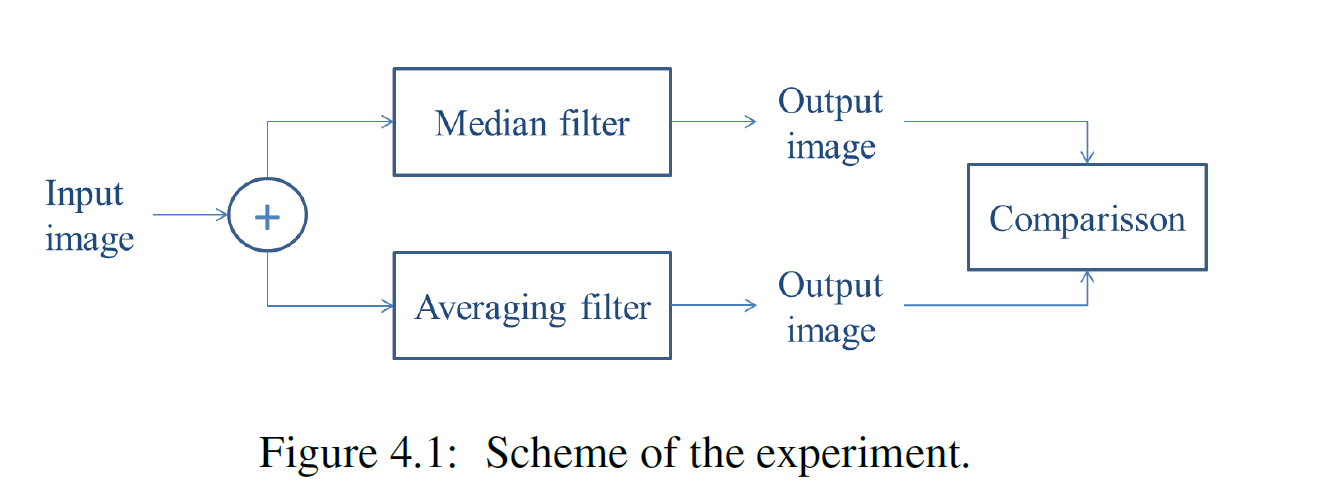

## Example:

In [ ]:
medalja = cv2.imread('/content/drive/MyDrive/Images/medalja_dubrovnik.png')
medalja = cv2.cvtColor(medalja, cv2.COLOR_BGR2GRAY)

# Adding various noises
medaljaGN = skimage.img_as_ubyte(skimage.util.random_noise(medalja, 
                                                           mode = 'gaussian',
                                                           clip = True,
                                                           var = 0.1))

medaljaSP = skimage.img_as_ubyte(skimage.util.random_noise(medalja, 
                                                           mode = 's&p',
                                                           amount = 0.3))

Median filter is a statistical filter which is applied block-wise in image processing: for each input block of a given size the filter results with a median value of this block. 

Median filtering can be performed by using the function [scipy.signal.medfilt2d()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt2d.html).

Averaging, which also can be viewed as a statistical filter, can be obtained with convolution.

## Example:

In [ ]:
# Filtering the noise with a median filter, block size 5x5
medaljaMF = medfilt2d(medaljaGN, kernel_size = 5)

# Creating an 5x5 averaging mask
mask = np.ones((5, 5))
mask = mask / np.sum(mask)
print(mask)
medaljaAF = convolve2d(medaljaSP, 
                       mask, 
                       mode = 'same')

# Plot the original, the noisy, and both filtered images
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
axs[0, 0].imshow(medalja, cmap='gray')
axs[1, 1].imshow(medaljaGN, cmap='gray')
axs[0, 1].imshow(medaljaMF, cmap='gray')
axs[1, 0].imshow(medaljaAF, cmap='gray')
fig.show()

### **4.4.1 Problems**

1. Choose another arbitrary image.
Create 2 noisy images from it: one by adding the Gaussian noise and the other one by adding the salt&pepper noise.

In [ ]:
# Write-in your solution
klis = cv2.imread('/content/drive/MyDrive/Images/klis2.png')
klis = cv2.cvtColor(klis, cv2.COLOR_BGR2GRAY)

# Adding various noises
klisGN = skimage.img_as_ubyte(skimage.util.random_noise(klis, 
                                                           mode = 'gaussian',
                                                           clip = True,
                                                           var = 0.1))

klisSP = skimage.img_as_ubyte(skimage.util.random_noise(klis, 
                                                           mode = 's&p',
                                                           amount = 0.3))

2. Try denoising these images with median and averaging filters. Comment on the results. Which filter is more appropriate for which type of the noise?

In [ ]:
# Write-in your solution
# Filtering the noise with a median filter, block size 5x5
klisMF_g= medfilt2d(klisGN, kernel_size = 5)
klisMF_sp= medfilt2d(klisSP, kernel_size = 5)

# Creating an 5x5 averaging mask
mask = np.ones((5, 5))
mask = mask / np.sum(mask)
klisAF_g = convolve2d(klisGN, 
                       mask, 
                       mode = 'same')
klisAF_sp = convolve2d(klisSP, 
                       mask, 
                       mode = 'same')

# Plot the original, the noisy, and both filtered images
fig, axs = plt.subplots(3, 3, figsize=(16, 16))
axs[0, 0].imshow(klis, cmap='gray')
axs[0, 1].imshow(klisGN, cmap='gray')
axs[0, 2].imshow(klisSP, cmap='gray')

axs[1, 0].imshow(klis, cmap='gray')
axs[1, 1].imshow(klisMF_g, cmap='gray')
axs[1, 2].imshow(klisMF_sp, cmap='gray')

axs[2, 0].imshow(klis, cmap='gray')
axs[2, 1].imshow(klisAF_g, cmap='gray')
axs[2, 2].imshow(klisAF_sp, cmap='gray')
fig.show()

Za salt%pepper/impulsni šum praktičniji je median filter. Naime, median filter je nelinearan te se koristi za uklanjanje izoliranih točaka i linija bez mijenjanja ostatka slike. Međutim, median filter je loš za otklanjanje gaussovog šuma jer nije praktičan kada je broj točaka šuma veći od polovice ukupnog broja točaka. Za otklanjanje gaussovog šuma koristi se filtar za usrednjavanje koji se sastoji od 2 djela: usrednjene originalne nezašumljene slike i usrednjenog šuma koji ima N puta manju varijancu. Što je maska za usrednjavanje veća, veći je i N pa je manji usrednjeni šum. Mana ovog filtra je što je slika nakon filtriranja zamućena zbog prostornog usrednjavanja.

# 4.5 Unsharpness removal

First attempts of removing the unsharpness from an image consisted of subtracting the blurred version of
an image from the original image. More precisely, the unsharpness is removed using the below written equation, where $A$ denotes a positive number larger than 1, and $I_{lf}$ denotes a blurred version of the image (ie. the low-pass filtered image).

$$I_{hb}(x,y) = AI(x,y) - I_{lf}(x,y)$$

The first applications of this method were registered in Germany in 1930s. However, we can observe this procedure from another point of view, i.e. instead of subtracting the blurred image from the original one, we can add the image with the emphasized edges to the original one. If the image $I$ consists of low and high derivatives ($I = I_{lf} +I_{hf}$), then the afromentioned equation can be rewritten as:

$$ I_{hb}(x,y) = AI_{hf}(x,y) + AI_{lf}(x,y) - I_{lf}
(x,y) = (A - 1)I_{lf}(x,y) + AI_{hf}(x,y) $$

From the obtained expression, we can see that we can increase the sharpness of a blurred image by adding proper high frequencies to it. This procedure is also called *high-boost* filtering, therefore we denote the output image as $I_{hb}$. The biggest problem of this procedure is to obtain the high frequencies of the image. In this exercise we will estimate them by means of derivative estimations. The scheme of the experiment is given in Fig. 4.2. The image is blurred with an averaging mask of an arbitrary size, i.e. 3x3.

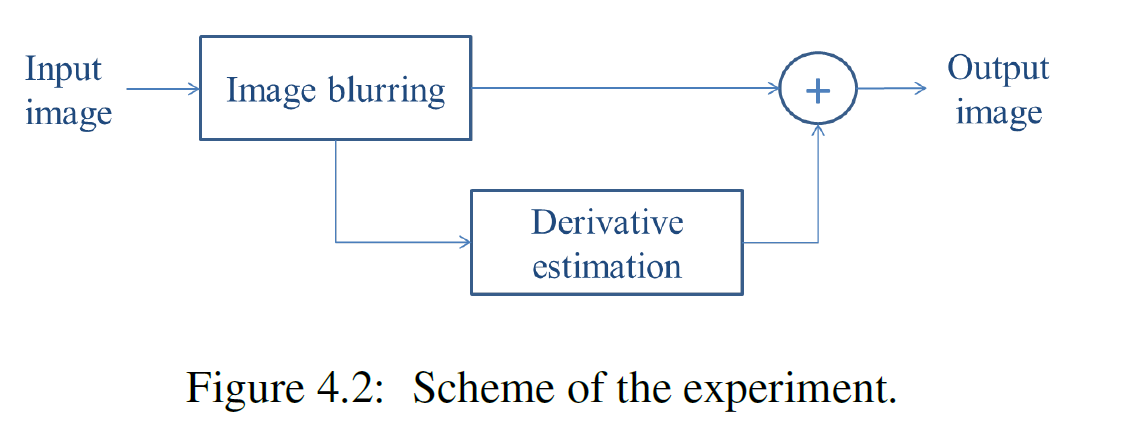

## Example:

In [ ]:
blood1 = cv2.imread('/content/drive/MyDrive/Images/blood1.tif')
blood1 = cv2.cvtColor(blood1, cv2.COLOR_BGR2GRAY)

# Creating an 3x3 averaging mask
mask = np.ones((3, 3))
mask = mask / np.sum(mask)

# Blurring the image with an averaging filter
bloodAF = convolve2d(blood1, 
                     mask, 
                     mode = 'same')

In a case of one-dimensional signal, the derivative in a point x can be approximated by using the following expression:

$$ \Delta(x) = \frac{f(x+h) - f(x)}{h} $$

In a two-dimensional case, the derivative has its direction and its value and can be estimated with some of existing operators. In our experiment, we will estimate the first derivative, i.e. the gradient, with a [Sobel
operator](https://en.wikipedia.org/wiki/Sobel_operator), and the second derivative with a [Laplace operator](https://en.wikipedia.org/wiki/Laplace_operator). 

For that purpose, we use the functions [skimage.filters.sobel_h()](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel_h), [skimage.filters.sobel_v()](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel_v), and [skimage.filters.laplace()](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.laplace) for convolving with the respective operator estimation.

## Example:

In [ ]:
# Plot the original image and its estimated derivatives
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
axs[0, 0].imshow(blood1, cmap='gray')
axs[1, 1].imshow(laplace(blood1), cmap='gray')
axs[0, 1].imshow(sobel_h(blood1), cmap='gray')
axs[1, 0].imshow(sobel_v(blood1), cmap='gray')
fig.show()

### **4.5.1 Problems**

1. Choose an arbitrary image and perform the procedure explained with a scheme in a Fig. 4.2. Display the difference between the images. How satisfied are you with the increased sharpness (reconstruction)?

In [ ]:
# Write-in your solution
blood = cv2.imread('/content/drive/MyDrive/Images/blood1.tif')
blood = cv2.cvtColor(blood, cv2.COLOR_BGR2GRAY)

# Creating an 3x3 averaging mask
mask = np.ones((4, 4))
mask = mask / np.sum(mask)

# Blurring the image with an averaging filter
bloodAF = convolve2d(blood, 
                     mask, 
                     mode = 'same')
fig, axs = plt.subplots(3, 3, figsize=(16, 16))
axs[0, 0].imshow(blood, cmap='gray')
axs[0, 1].imshow(bloodAF, cmap='gray')

axs[1, 0].imshow(bloodAF+2*laplace(bloodAF), cmap='gray')
axs[1, 1].imshow(bloodAF+2*sobel_h(bloodAF), cmap='gray')
axs[1, 2].imshow(bloodAF+2*sobel_v(bloodAF), cmap='gray')

axs[2, 0].imshow(blood-(bloodAF+2*laplace(bloodAF)), cmap='gray')
axs[2, 1].imshow(blood-(bloodAF+2*sobel_h(bloodAF)), cmap='gray')
axs[2, 2].imshow(blood-(bloodAF+2*sobel_v(bloodAF)), cmap='gray')
fig.show()

Ovom metodom izoštreni su rubovi na slikama.

2. Read the image medalja_dubrovnik.png and increase its sharpness by subtracting its blurred version (according to the first equation of this chapter). What did you obtain with this procedure?

In [ ]:
# Write-in your solution
medalja = cv2.imread('/content/drive/MyDrive/Images/medalja_dubrovnik.png')
medalja = cv2.cvtColor(medalja, cv2.COLOR_BGR2GRAY)
medalja = img_as_float(medalja)

# Creating an 3x3 averaging mask
mask = np.ones((3, 3))
mask = mask / np.sum(mask)

# Blurring the image with an averaging filter
medaljaAF = convolve2d(medalja, 
                     mask, 
                     mode = 'same')

fig, axs = plt.subplots(2, 2, figsize=(16, 16))
axs[0, 0].imshow(medalja, cmap='gray')
axs[0, 1].imshow(medaljaAF, cmap='gray')
axs[1, 0].imshow((4*medalja-medaljaAF), cmap='gray')

fig.show()

Ovim postupkom uklonjene su neoštrine na slici.

3. Read the image medalja_dubrovnik.png and increase its sharpness by adding its first derivative estimation, obtained by Sobel operator (according to the second equation of this chapter). What did you obtain?

In [ ]:
medalja = cv2.imread('/content/drive/MyDrive/Images/medalja_dubrovnik.png')
medalja = cv2.cvtColor(medalja, cv2.COLOR_BGR2GRAY)

# Creating an 3x3 averaging mask
mask = np.ones((3, 3))
mask = mask / np.sum(mask)

# Blurring the image with an averaging filter
medaljaAF = convolve2d(medalja, 
                     mask, 
                     mode = 'same')

fig, axs = plt.subplots(2, 2, figsize=(16, 16))
axs[0, 0].imshow(medalja, cmap='gray')
axs[0, 1].imshow(medaljaAF, cmap='gray')
axs[1, 0].imshow(medaljaAF+2*sobel_h(medaljaAF), cmap='gray')
axs[1, 1].imshow(medalja-(medaljaAF+2*sobel_h(medaljaAF)), cmap='gray')

**WRITE YOUR ANSWERS HERE**

4. Read the image 5.1.09.tiff from the USC-SIPI database and try to increase the sharpness by adding the first derivative (gradient) and the second derivative (Laplace operator). Which of these methods gives better results?

In [ ]:
url = "https://sipi.usc.edu/database/download.php?vol=misc&img=5.1.09"
moon = skimage.io.imread(url)

# Creating an 3x3 averaging mask
mask = np.ones((3, 3))
mask = mask / np.sum(mask)

# Blurring the image with an averaging filter
moonAF = convolve2d(moon, 
                     mask, 
                     mode = 'same')
fig, axs = plt.subplots(3, 3, figsize=(16, 16))
axs[0, 0].imshow(moon, cmap='gray')
axs[0, 1].imshow(moonAF, cmap='gray')

axs[1, 0].imshow(moonAF+2*laplace(moonAF), cmap='gray')
axs[1, 1].imshow(moonAF+2*sobel_h(moonAF), cmap='gray')
axs[1, 2].imshow(moonAF+2*sobel_v(moonAF), cmap='gray')

axs[2, 0].imshow(moon-(moonAF+2*laplace(moonAF)), cmap='gray')
axs[2, 1].imshow(moon-(moonAF+2*sobel_h(moonAF)), cmap='gray')
axs[2, 2].imshow(moon-(moonAF+2*sobel_v(moonAF)), cmap='gray')
fig.show()

Sobelov operator mjeri nagib dok Laplaceov mjeri promjenu nagiba.Za ovaj primjer bolje rezultate dao je Laplaceov operator jer slika sadrži veliki broj sitnih detalja i linija za čije se isticanje on koristi.

5. Try both methods (adding the 1st and the 2nd derivative estimation) on two more images. What is the relevant difference between adding the 1st and the 2nd derivative to an image? Which method gives better results?

In [ ]:
# Write-in your solution
moon = cv2.imread('/content/drive/MyDrive/Images/moon.tif')
moon = cv2.cvtColor(moon, cv2.COLOR_BGR2GRAY)

# Creating an 3x3 averaging mask
mask = np.ones((3, 3))
mask = mask / np.sum(mask)

# Blurring the image with an averaging filter
moonAF = convolve2d(moon, 
                     mask, 
                     mode = 'same')
fig, axs = plt.subplots(3, 3, figsize=(16, 16))
axs[0, 0].imshow(moon, cmap='gray')
axs[0, 1].imshow(moonAF, cmap='gray')

axs[1, 0].imshow(moonAF+2*laplace(moonAF), cmap='gray')
axs[1, 1].imshow(moonAF+2*sobel_h(moonAF), cmap='gray')
axs[1, 2].imshow(moonAF+2*sobel_v(moonAF), cmap='gray')

axs[2, 0].imshow(moon-(moonAF+2*laplace(moonAF)), cmap='gray')
axs[2, 1].imshow(moon-(moonAF+2*sobel_h(moonAF)), cmap='gray')
axs[2, 2].imshow(moon-(moonAF+2*sobel_v(moonAF)), cmap='gray')
fig.show()

# Write-in your solution
saturn = cv2.imread('/content/drive/MyDrive/Images/saturn.tif')
saturn = cv2.cvtColor(saturn, cv2.COLOR_BGR2GRAY)

# Creating an 3x3 averaging mask
mask = np.ones((3, 3))
mask = mask / np.sum(mask)

# Blurring the image with an averaging filter
saturnAF = convolve2d(saturn, 
                     mask, 
                     mode = 'same')
fig, axs = plt.subplots(3, 3, figsize=(16, 16))
axs[0, 0].imshow(saturn, cmap='gray')
axs[0, 1].imshow(saturnAF, cmap='gray')

axs[1, 0].imshow(saturnAF+2*laplace(saturnAF), cmap='gray')
axs[1, 1].imshow(saturnAF+2*sobel_h(saturnAF), cmap='gray')
axs[1, 2].imshow(saturnAF+2*sobel_v(saturnAF), cmap='gray')

axs[2, 0].imshow(saturn-(saturnAF+2*laplace(saturnAF)), cmap='gray')
axs[2, 1].imshow(saturn-(saturnAF+2*sobel_h(saturnAF)), cmap='gray')
axs[2, 2].imshow(saturn-(saturnAF+2*sobel_v(saturnAF)), cmap='gray')
fig.show()

Laplacov i sobelov operator ističu diskontinuitete intenziteta, ali Laplaceov je bolji za poboljšanje finih detalja poput tankih linija i točaka, a gradijent je bolji za isticanje rubova.